#Package Installation

In [7]:
!pip install matplotlib

In [6]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 32.5 MB/s eta 0:00:00


In [8]:
!pip install wordcloud

# 구글 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/빅데이터/크롤링/'

In [4]:
FONT_PATH = '/content/drive/MyDrive/빅데이터/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumBarunGothic


# WordCloud

In [9]:
import pandas as pd
import re

from wordcloud import WordCloud, STOPWORDS

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from collections import Counter

import matplotlib.font_manager as fm

fontpath = '/content/drive/MyDrive/빅데이터/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')


In [10]:
df = pd.read_csv(path + '장애인콜택시민원텍스트데이터.csv', index_col=0)

In [11]:
df

,link,content
title,,
장애인콜택시 임수빈상담원님을칭찬합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,2023년11월7일에 1588-4388에전화해서 목적지를 중화역3번출구에서 우림경희...
서울31사9356박성윤기사님을칭찬합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,2023년 10월31일에 회기동경희의료원에서 중화역3번출구에갈때 서울31사9356박...
곧퇴직하시는75마5638화랑대차고지 최동화주임님을칭찬합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,2023년10월30일에 면목동 명인한의원에서 망우동 동부제일병원에갈때 75마5638...
77라3761종묘차고지 이봉준주임님을칭찬합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,77라3761종묘차고지 이봉준주임님을칭찬합니다.울적해서 이마트로 행선지를 잡고 탑승...
72우1697면목차고지이영진주임님을칭찬합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,2023년9월1일하고 9월3일에 72우1697이영진주임님께서 배차됐는데 문여려서 승...
...,...,...
부탁 드리겠습니다.,https://www.sisul.or.kr/open_content/calltaxi/...,장애인콜택시 339 글이 비록 공공연하게는 저 개인의 수요 요구이지만잠재적으로는 저...
서울 장콜 마들차고지 소속이신 송진욱 기사님 칭찬합니다!~,https://www.sisul.or.kr/open_content/calltaxi/...,서울 장콜 마들차고지 소속이신 송진욱 기사님을 칭찬합니다!~ 터프하고 유쾌하신 기사...
생명과 관련된 중요한 문제를 제기합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,안녕하십니까?선진 교통 문화를 위해 애쓰시는 관계자 분들의 노고에 감사합니다.그동안...


In [12]:
okt = Okt()

content_list = list(df['content'])
noun_list = []

for sentence in content_list:


    sentence = re.sub('[a-zA-z0-9]','', sentence)

    for word, tag in okt.pos(sentence):
        if tag in ['Noun']:

            if len(word) == 1:
                continue

            else:
                noun_list.append(word)

count = Counter(noun_list)
words = dict(count.most_common(n=50))

In [13]:
words

{'기사': 804,
 '운행': 466,
 '장애인': 431,
 '배차': 418,
 '택시': 391,
 '안전': 389,
 '차량': 381,
 '항상': 372,
 '칭찬': 316,
 '시간': 306,
 '위해': 302,
 '이용': 291,
 '장애': 259,
 '하루': 219,
 '하차': 197,
 '화이팅': 191,
 '오늘': 185,
 '운전': 177,
 '기분': 175,
 '병원': 166,
 '서울': 152,
 '사고': 146,
 '주임': 144,
 '년월': 135,
 '휠체어': 128,
 '도착': 125,
 '바짝': 118,
 '이야기': 117,
 '인사': 113,
 '전화': 111,
 '생각': 108,
 '해주시': 106,
 '기억': 100,
 '이동': 100,
 '면목동': 95,
 '마음': 95,
 '예방': 95,
 '장콜': 94,
 '정말': 90,
 '감사': 89,
 '탑승': 88,
 '이용자': 87,
 '고객': 85,
 '경우': 84,
 '개문': 84,
 '상황': 77,
 '존경': 76,
 '승하': 75,
 '다시': 74,
 '퇴근': 68}

In [14]:
words.items()

dict_items([('기사', 804), ('운행', 466), ('장애인', 431), ('배차', 418), ('택시', 391), ('안전', 389), ('차량', 381), ('항상', 372), ('칭찬', 316), ('시간', 306), ('위해', 302), ('이용', 291), ('장애', 259), ('하루', 219), ('하차', 197), ('화이팅', 191), ('오늘', 185), ('운전', 177), ('기분', 175), ('병원', 166), ('서울', 152), ('사고', 146), ('주임', 144), ('년월', 135), ('휠체어', 128), ('도착', 125), ('바짝', 118), ('이야기', 117), ('인사', 113), ('전화', 111), ('생각', 108), ('해주시', 106), ('기억', 100), ('이동', 100), ('면목동', 95), ('마음', 95), ('예방', 95), ('장콜', 94), ('정말', 90), ('감사', 89), ('탑승', 88), ('이용자', 87), ('고객', 85), ('경우', 84), ('개문', 84), ('상황', 77), ('존경', 76), ('승하', 75), ('다시', 74), ('퇴근', 68)])

In [ ]:
type(words)

dict

In [ ]:
words.pop("장애인")

431

In [ ]:
words.pop("택시")

391

In [ ]:
words.pop("위해")

302

In [ ]:
words.pop("정말")

90

In [ ]:
words.pop("생각")

108

In [ ]:
words.pop("하루")

219

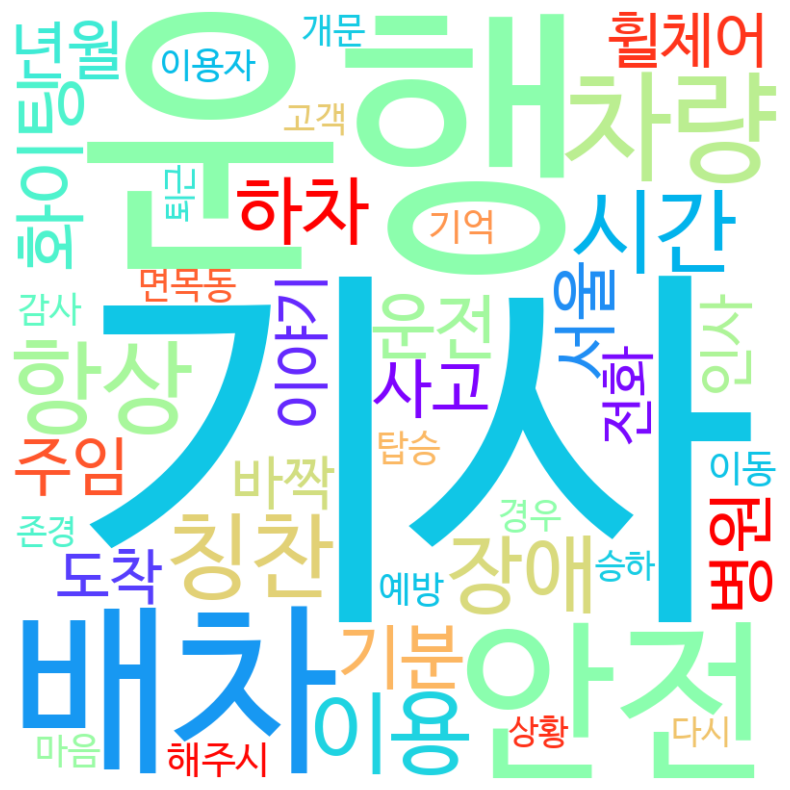

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    font_path = fontpath,
    background_color = 'white',
    colormap = 'rainbow_r',
    width = 800,
    height = 800,
    stopwords = STOPWORDS
).generate_from_frequencies(words)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image, ImageFilter

In [ ]:
taxi1 = Image.open(path + 'taxi_1.jpg')

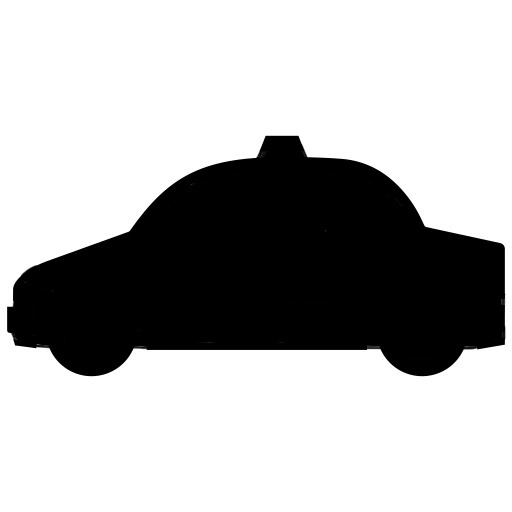

In [ ]:
taxi1

In [ ]:
taxi2 = Image.open(path + 'taxi_2.jpg')

In [ ]:
import numpy as np
mask_array = np.array(taxi1)
mask_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
df = WordCloud(font_path = fontpath,
                  background_color = "white",
                  collocations = False,
                 mask = mask_array)

df.generate

<bound method WordCloud.generate of <wordcloud.wordcloud.WordCloud object at 0x7a6749d52380>>

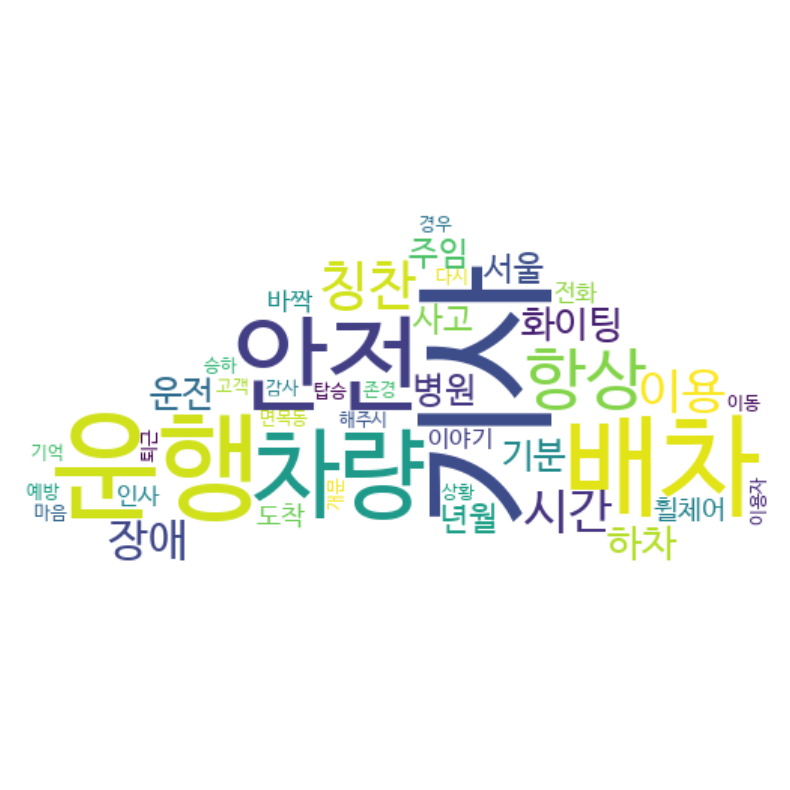

In [ ]:
alice_mask = np.array(taxi1)

wordcloud = WordCloud(font_path = fontpath,
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
)

wordcloud = wordcloud.generate_from_frequencies(words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<ipython-input-15-b7f7a1a1dbe8>:13: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-15-b7f7a1a1dbe8>:13: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-15-b7f7a1a1dbe8>:13: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  plt.tight_layout()
<ipython-input-15-b7f7a1a1dbe8>:13: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  plt.tight_layout()
<ipython-input-15-b7f7a1a1dbe8>:13: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  plt.tight_layout()
<ipython-input-15-b7f7a1a1dbe8>:13: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from current font.
  plt.tight_layout()
<ipython-input-15-b7f7a1a1dbe8>:13: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
<ipython-input-15-b7f7a1a1dbe8>:13: UserWarning: Glyph 48

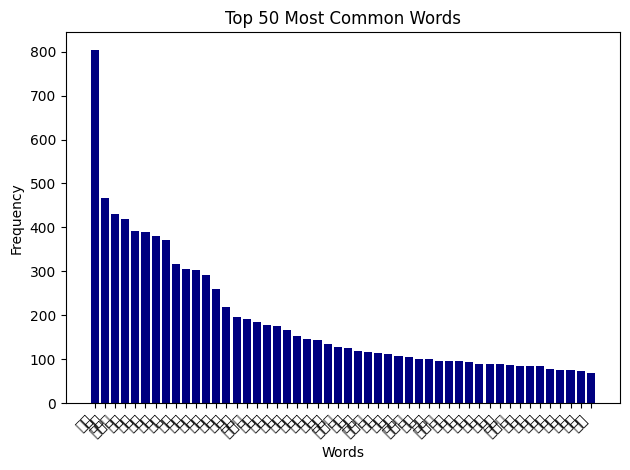

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

fontpath = '/content/drive/MyDrive/빅데이터/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

plt.bar(words.keys(), words.values(), color='navy')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words')
plt.tight_layout()

plt.show()

<ipython-input-17-6ecb5aff74a7>:15: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  plt.tight_layout()
<ipython-input-17-6ecb5aff74a7>:15: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-17-6ecb5aff74a7>:15: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  plt.tight_layout()
<ipython-input-17-6ecb5aff74a7>:15: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
<ipython-input-17-6ecb5aff74a7>:15: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-17-6ecb5aff74a7>:15: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  plt.tight_layout()
<ipython-input-17-6ecb5aff74a7>:15: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  plt.tight_layout()
<ipython-input-17-6ecb5aff74a7>:15: UserWarning: Glyph 

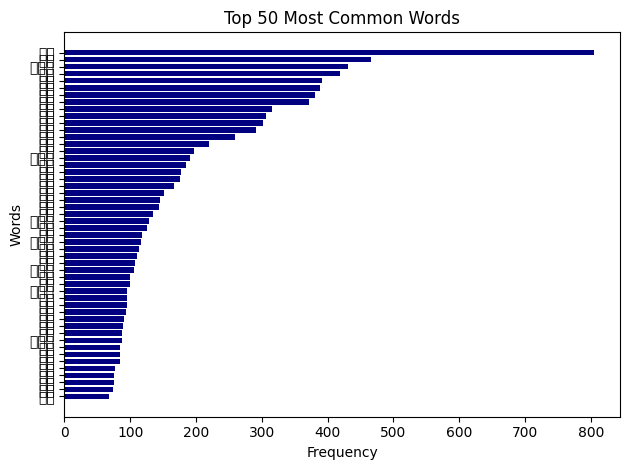

In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

fontpath = '/content/drive/MyDrive/빅데이터/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

# Assuming words is a dictionary containing word frequencies
words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1], reverse=True)}

plt.barh(list(words.keys())[::-1], list(words.values())[::-1], color='navy')
plt.xlabel('Frequency')  # Switch x-axis label to 'Frequency'
plt.ylabel('Words')      # Switch y-axis label to 'Words'
plt.title('Top 50 Most Common Words')
plt.tight_layout()

plt.show()

In [18]:
words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1], reverse=True)[:50]}
words

{'기사': 804,
 '운행': 466,
 '장애인': 431,
 '배차': 418,
 '택시': 391,
 '안전': 389,
 '차량': 381,
 '항상': 372,
 '칭찬': 316,
 '시간': 306,
 '위해': 302,
 '이용': 291,
 '장애': 259,
 '하루': 219,
 '하차': 197,
 '화이팅': 191,
 '오늘': 185,
 '운전': 177,
 '기분': 175,
 '병원': 166,
 '서울': 152,
 '사고': 146,
 '주임': 144,
 '년월': 135,
 '휠체어': 128,
 '도착': 125,
 '바짝': 118,
 '이야기': 117,
 '인사': 113,
 '전화': 111,
 '생각': 108,
 '해주시': 106,
 '기억': 100,
 '이동': 100,
 '면목동': 95,
 '마음': 95,
 '예방': 95,
 '장콜': 94,
 '정말': 90,
 '감사': 89,
 '탑승': 88,
 '이용자': 87,
 '고객': 85,
 '경우': 84,
 '개문': 84,
 '상황': 77,
 '존경': 76,
 '승하': 75,
 '다시': 74,
 '퇴근': 68}

<ipython-input-19-00cf23be4e68>:23: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  plt.tight_layout()
<ipython-input-19-00cf23be4e68>:23: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-19-00cf23be4e68>:23: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  plt.tight_layout()
<ipython-input-19-00cf23be4e68>:23: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
<ipython-input-19-00cf23be4e68>:23: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-19-00cf23be4e68>:23: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  plt.tight_layout()
<ipython-input-19-00cf23be4e68>:23: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  plt.tight_layout()
<ipython-input-19-00cf23be4e68>:23: UserWarning: Glyph 

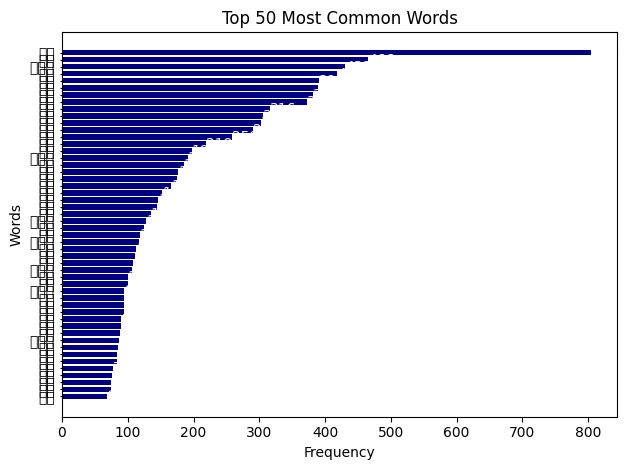

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

fontpath = '/content/drive/MyDrive/빅데이터/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

# Assuming words is a dictionary containing word frequencies
words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1], reverse=True)[:50]}

fig, ax = plt.subplots()
bars = ax.barh(list(words.keys())[::-1], list(words.values())[::-1], color='navy')
ax.set_xlabel('Frequency')  # Switch x-axis label to 'Frequency'
ax.set_ylabel('Words')      # Switch y-axis label to 'Words'
ax.set_title('Top 50 Most Common Words')
ax.tick_params(axis='y', which='both', direction='inout')  # Move y-axis ticks to the right

# Adding data values on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())),
            va='center', ha='left', color='white')

plt.tight_layout()
plt.show()
